# Лабораторная работа 1 

## 1.1 Задана плотность распределения вероятностей некоторой случайной величины: $$ f(x) = Ax^3(5-x), x \in (0, 5)$$ где 𝐴 – нормировочная константа. Сгенерировать выборку из данного распределения. На основе сгенерированной выборки проверить гипотезу согласия с заданным распределением.

In [1]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
np.random.seed(100)
a = 0
b = 5
A = Symbol('A')
x = Symbol('x')

$$\int^{5}_{0} f(x) dx = 1 \Rightarrow A$$

In [2]:
f = A * np.power(x, 3) * (5 - x)
F = integrate(f, (x, 0, 5))
solve(F - 1, A)

[4/625]

In [3]:
A = 4/625

$$F(x)|_{0}^{5} = \frac{625A}{4} = 1$$
$$A = \frac{4}{625}$$

In [4]:
def f(x):
    return A * np.power(x, 3) * (5 - x)
x = np.arange(0, 5, 0.1)

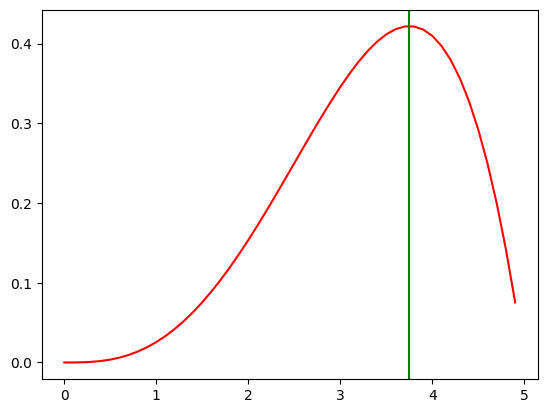

In [5]:
plt.plot(x, f(x), color = 'red')
plt.axvline(x = 3.75, color = 'green')

Найдем локальный максимум функции через дифференцирование

In [6]:
x = Symbol('x')
f = A * np.power(x, 3) * (5 - x)
solve([diff(f, x),
       x > 0,
       x < 5]
      , x)

Eq(x, 3.75)

In [7]:
def f(x):
    return A * np.power(x, 3) * (5 - x)
M = f(3.75)

def normalized_f(x):
    return A * np.power(x, 3) * (5 - x)/M

$$M = \max\limits_{0 \leq x \leq 5} f(x) = f(3.75) = 0.421875$$

Генерируем $u_1, u_2 \sim U_{0, 1}$

In [8]:
realization = list()
while len(realization) != 100:
    x1 = a + (b - a) * np.random.uniform(0, 1)
    x2 = M * np.random.uniform(0, 1)
    if x2 <= f(x1):
        realization.append(x1)
realization = np.array(realization)

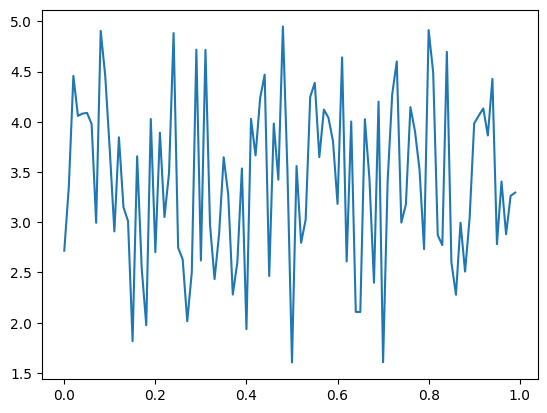

In [9]:
plt.plot(np.arange(0, 1, .01), realization)

In [10]:
s = 0
h = (b - a)/10
f = A * np.power(x, 3) * (5 - x)
n = 100
P_i = list()
for i in range(1, 11, 1):
    p_i = integrate(f, (x, (i - 1) * h, i * h))
    n_i = np.size(realization[np.logical_and(realization > (i - 1) * h, realization <= i * h)])
    s += np.power(n_i - n * p_i, 2) / (n * p_i)
print(s)

10.0626439659486


$$\chi^2_{obs.} = 10.0626439659486$$

$$\chi^2_{crit. \alpha = 0.1} = 14.684$$ 

$$\chi^2_{obs.} < \chi^2_{crit. \alpha = 0.1} \rightarrow$$ Гипотеза согласия подтверждается.

## 1.2 Пусть случайный вектор $X=(𝑋_1, ..., 𝑋_n)$ имеет многомерное нормальное распределение $N(\mu, \Sigma)$ (вектор средних $\mu$ и матрица ковариаций $\Sigma$ заданы). На основе сгенерированной выборки найти оценку матрицы ковариаций и проверить гипотезу о равенстве коэффициента корреляции 𝐶𝑜𝑟($𝑋_i, 𝑋_j$) (для фиксированных индексов $i, j = \overline{1,n}$) требуемому значению.

$$X = \begin{pmatrix}
X_1 \\
X_2 
\end{pmatrix} \sim N \bigg[ \begin{pmatrix}
\mu_1 \\
\mu_2 
\end{pmatrix}, \begin{pmatrix}
\sigma^2_1 & \rho \\
\rho & \sigma^2_2
\end{pmatrix}\bigg]$$

In [11]:
mean_ = np.matrix([0, 0, 0])
cov_ = np.matrix([[1, 0.8, -0.2],
                  [0.8, 1, -0.3],
                  [-0.2, -0.3, 1]])

In [12]:
C = np.linalg.cholesky(cov_)

In [13]:
X1 = []
X2 = []
X3 = []
for i in range(100000):
    Y = np.matrix(np.random.normal(loc = 0, scale = 1, size = 3))
    X = C * Y.T + mean_.T
    X1.append(X[0, 0])
    X2.append(X[1, 0])
    X3.append(X[2, 0])

In [14]:
np.corrcoef(X1, X3)

array([[ 1.        , -0.19975913],
       [-0.19975913,  1.        ]])

In [15]:
np.cov(X1, X2)

array([[0.99196588, 0.79314887],
       [0.79314887, 0.99314874]])

$$\rho_{Cov(X1, X2)} = \rho_{Cor(X1, X2)}$$

## 2. С помощью метода Монте-Карло вычислить оценку мат. ожидания кратчайшего пути из А в В и вероятности того, что этот кратчайший путь превысит некоторое заданное значение $u$.

## 2.1 СВ $X_1,..., X_5$ независимы и распределены показательно.

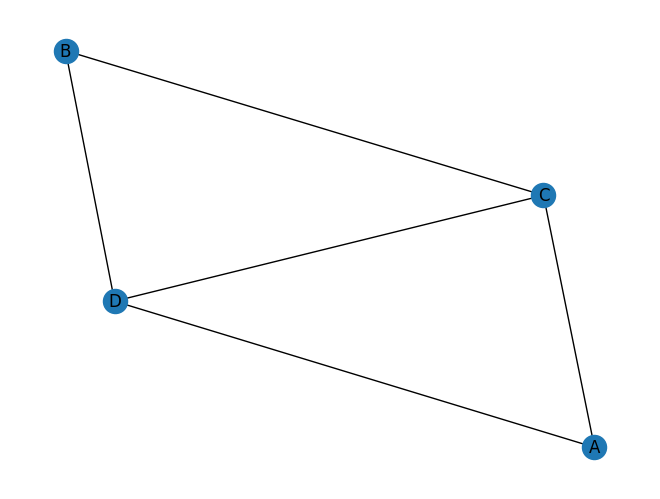

In [16]:
import networkx as nx
G = nx.DiGraph()

G.add_edge(u_of_edge = 'A', v_of_edge = 'C', weight = 1)
G.add_edge(u_of_edge = 'A', v_of_edge = 'D', weight = 1)
G.add_edge(u_of_edge = 'C', v_of_edge = 'D', weight = 1)
G.add_edge(u_of_edge = 'C', v_of_edge = 'B', weight = 1)
G.add_edge(u_of_edge = 'D', v_of_edge = 'B', weight = 1)
G = nx.to_undirected(G)
nx.draw(G, with_labels=True)

$$X = \big(X_1, ..., X_2 \big), X_i \sim Exp \big( \frac{1}{\lambda} \big)$$

In [17]:
# np.random.seed(100)
N = 100
X = np.zeros((N, 5))

In [18]:
for i in range(N):
    scale = np.random.uniform(low = 0, high = 9, size = 5)
    X[i, ] = np.random.exponential(scale = scale, size = 5)

In [19]:
mean_matrix = np.zeros((1, 5))
for i in range(5):
    mean_matrix[0, i] = np.mean(X[:, i])

Всевозможные кратчайшие пути:

In [20]:
R1 = mean_matrix[0, 0] + mean_matrix[0, 3]
R2 = mean_matrix[0, 0] + mean_matrix[0, 2] + mean_matrix[0, 4]
R3 = mean_matrix[0, 1] + mean_matrix[0, 4]
R4 = mean_matrix[0, 1] + mean_matrix[0, 2] + mean_matrix[0, 3]

In [21]:
R1, R2, R3, R4

(9.045716387200601, 13.543133827595945, 10.070379080383944, 11.92986475435807)

In [22]:
u = min(R1, R2, R3, R4) # R1

Количество путей, превышающих $u$.

In [23]:
count = sum(np.sum(X[:, (0, 3)], axis=1) > u)

In [24]:
count/N

0.36

$$P(p > u) = 0.34$$

## 2.2 случайный вектор $X = (X_1, ..., X_5)$ распределен нормально с заданным вектором средних $\mu = (\mu_1, ..., \mu_)$ и заданной матрицей ковариаций $\Sigma$.


In [25]:
np.random.seed(10)
mean_ = [30, 30, 30, 30, 30]
data = np.random.randn(5, 5)
cov_ = np.cov(data, rowvar=False)
N = 100

In [26]:
C = np.linalg.cholesky(cov_)

In [27]:
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []

In [28]:
for i in range(N):
    Y = np.matrix(np.random.normal(loc = mean_, scale = np.diag(cov_), size = 5))
    X = C * Y.T + np.matrix(mean_).T
    X1.append(X[0, 0])
    X2.append(X[1, 0])
    X3.append(X[2, 0])
    X4.append(X[2, 0])
    X5.append(X[2, 0])

In [29]:
mean_matrix = np.zeros((1, 5))
mean_matrix[:, 0] = np.mean(X1)
mean_matrix[:, 1] = np.mean(X2)
mean_matrix[:, 2] = np.mean(X3)
mean_matrix[:, 3] = np.mean(X4)
mean_matrix[:, 4] = np.mean(X5)

In [30]:
R1 = mean_matrix[0, 0] + mean_matrix[0, 3]
R2 = mean_matrix[0, 0] + mean_matrix[0, 2] + mean_matrix[0, 4]
R3 = mean_matrix[0, 1] + mean_matrix[0, 4]
R4 = mean_matrix[0, 1] + mean_matrix[0, 2] + mean_matrix[0, 3]

In [31]:
R1, R2, R3, R4 # R3 min

(83.60398949131613, 98.69524656613802, 98.22857531707514, 113.31983239189704)

In [32]:
u = R3

In [33]:
# count = sum(np.sum(np.array(X2) + np.array(X5)) > u) Переделать
count = 0
for i in range(N):
    if X2[i] + X5[i] > u:
        count += 1

In [34]:
p = count/N
p

0.49

$$P(p > u) = 0.54$$

## 3. В области 𝐴, представляющей собой бесконечный слой (на плоскости) вакуума толщиной 𝐷 м, было одновременно испущено 𝑁 +1 фотонов, где 𝑁 – случайная величина, имеющая распределение Пуассона с параметром 𝜆 = 2. Предполагается, что точки излучения расположены на одной прямой и их распределение по толщине 𝐷 равномерное, а распределение направлений излучения фотонов – изотропное. С каждой из двух сторон расположен детектор в виде бесконечной полосы. При попадании в детектор фотон поглощается. Детекторы включены в схему совпадений, которая срабатывает в том случае, если промежуток времени между попаданиями фотонов в детекторы не превышает ∆𝑡 = 3 · $10^{−8}$ с. Скорость света в вакууме 𝐶 = 3 · $10^8$ м/с. Вычислить вероятность того, что схема сработала.


In [38]:
from scipy.special import factorial
import numpy as np
# np.random.seed(100)
D = 10
c = 3 * 10**8
d_t = 3 * 10**(-8)

In [39]:
pois = lambda k: np.exp(-2) * np.power(2, k) / factorial(k)

In [40]:
P = np.array([pois(i) for i in range(0, 32)])
u = np.random.uniform(low = 0, high = 1)
N = np.where(np.sort(np.append(P, u)) == u)[0][0] + 1

In [41]:
# Начальные координаты:
Y0 = np.random.uniform(low = -D/2, high = D/2, size = N)
# Начальный угол
phi = np.random.uniform(low = 0, high = 2 * np.pi, size = N)
# Расчет времени полета до детектора
t = (np.where(phi < np.pi, D/2, -D/2) - Y0) / np.sin(phi) * c**-1

In [42]:
p = np.count_nonzero(np.diff(np.sort(t)) < d_t) / N
p

0.896551724137931

4. Пусть имеется $m + n$ клеток некоторой ткани. При этом клетки $\overline{1,n}$ являются злокачественными, а клетки $\overline{n+1, n + m}$ – здоровыми. В результате проведения терапии клетка $i = \overline{1, n+m}$ погибает через время $T_i$, имеющее показательное распределение с параметром $\lambda$. Случайные величины $T_1, ..., T_{n + m}$ предполагаются независимыми. Пусть в некоторый момент времени все злокачественные клетки погибли, требуется вычислить оценку вероятности того, что число оставшихся здоровых клеток $N$ превысит некоторое заданное значение $k$: 

$$P(N \geq k) = P(max_{i \leq n}T_i < T^{(k)} ),$$

где $T^{(k)}$ –$k$-ая по величине из значений $T_{n + 1}, ..., T_{n+m}$, т. е. 

$$T^{(1)} \geq ... \geq T^{(k)} \geq ... \geq T^{(m)}$$

Для оценки искомой вероятности воспользоваться условным методом Монте-Карло, предварительно получив выражение для условной вероятности

$$P(N \geq k | T^{(k)}).$$


In [140]:
import numpy as np
# np.random.seed(100)
n = 10
m = 100
N = 1000

def F(lam, x):
    return np.power(1 - np.exp(- lam * x), n)


In [141]:
def iterate():
    lam = np.random.uniform(0, 100, size = n)
    phi = np.random.uniform(0, 100, size = m)
    for i in range(n):
        if lam[i] > phi[i]:
            lam[i], phi[i] = phi[i], lam[i]
    Tb = np.sort(np.random.exponential(scale = 1 / lam, size = n))
    Tg = np.sort(np.random.exponential(scale = 1 / phi, size = m))
    k = np.random.randint(n, n + m)
    p = np.power(F(lam, Tg[k - n]), N)
    return p

In [142]:
f"Оценка вероятности: {np.sum([iterate() for i in range(N)])/N}"

'Оценка вероятности: 0.3962932979075264'

5. Рассматриваются случайные блуждания без самопересечений (SAW - Self-Avoiding Walk) на неограниченной двумерной целочисленной решетке, стартующие с начала координат (см. рис. 2). Найти оценку среднего расстояния от начала координат до финальной точки блуждания заданной длины 𝑛 с помощью метода существенной выборки.


In [6]:
import numpy as np
from tqdm import tqdm
N = 10000
n = 30

In [7]:
def define_near_points(x, y: (int, int), visited_points: list) -> list:
    '''Return adjacent not visited points'''
    variations = [(x + 1, y), (x, y + 1),
                  (x - 1, y), (x, y - 1)]
    return [v for v in variations if v not in visited_points]

In [8]:
def SAW(distance: int) -> np.float32:
    '''SAW iteration with returns - distance and number of available steps before ending'''
    x, y = 0, 0
    l = 0
    visited_p = [(0, 0)]
    for i in range(n):
        adj_points = define_near_points(x, y, visited_p)
        if bool(adj_points):
            r = np.random.randint(0, len(adj_points))
            x, y = adj_points[r]
            visited_p.append((x, y))
            l = len(adj_points)
        else:
            return np.sqrt(np.power(x, 2) + np.power(y, 2)), l
    return np.sqrt(np.power(x, 2) + np.power(y, 2)), l

In [9]:
delta = np.array([])
helping_pdf = np.array([])
for i in tqdm(range(N)):
    distance, adj_len = SAW(n)
    delta = np.append(delta, distance)
    helping_pdf = np.append(helping_pdf, adj_len)

100%|██████████| 10000/10000 [00:01<00:00, 5476.89it/s]


In [10]:
f'Average distance evaluation: {np.sum(delta / np.sum(delta) * delta):.4f}' 

'Average distance evaluation: 9.5738'

6. В пространстве расположен шар $M$ с центром в точке $(x_0, y_0, z_0)$ и радиусом $R$. Требуется с помощью методов Монте-Карло вычислить интеграл: 

$$\int_{H^2} V(\omega) cos^{\gamma}\theta d \gamma$$

где $H^2$ - единичная полусфера с центром в начале координат; $\theta$ - угол между направлением $\omega$ и осью $z$; $\gamma$ - некоторый положительный параметр; $V(\omega)$ - так называемая функция видимости:

$$
V(\omega)=
\begin{cases}
0, \text{если прямая с направляющим вектором $\omega$ пересекает шар M}\\
1, \text{иначе}\\
\end{cases}
$$

При расчетах воспользоваться методом существенной выборки, взяв в качестве вспомогательного распределения:

$$q(\omega) \propto cos^{\gamma}\theta$$

Сравнить результаты со стандартным методом Монте-Карло (генерация равномерно распределенных точек на полусфере) в терминах дисперсии оценок.


In [62]:
import numpy as np
# Радиус шара
R = 2
# Координаты шара
x_0, y_0, z_0 = 4, 4, 4
# Параметр гамма
gamma = 3
N = 10000
n = 1000

In [63]:
def D(a, b, c):
    d = b ** 2 - 4 * a * c
    return np.where(d >= 0, 1, 0)

#### Стандартный метод Монте-Карло

In [69]:
# Ball center
center = np.array([4, 4, 3])

# Angles
phi = np.random.uniform(0, np.pi/2, (N, n))
theta = np.arccos(
    1 - np.random.uniform(0, 1, (N, n))\
        **(1/(gamma+1))
)

# Vector W coords
w_x = np.sin(theta) * np.cos(phi)
w_y = np.sin(theta) * np.sin(phi)
w_z = np.cos(theta)

# Pushing stack
w = np.stack((w_x, w_y, w_z), axis=-1)

# Is intersect?
a = np.sum(w**2, axis=-1)
b = -2 * np.einsum('ijk,k->ij', w, center)
c = np.sum(center**2) - R**2
V = D(a, b, c)

# Integral valuesё
I = 2 * np.pi / ((gamma + 1) * N) * np.sum(V, axis=-1)
f'Dispersion of the integral values = {np.var(I):}'

'Dispersion of the integral values = 3.146051940384196e-06'

#### Метод существенной выборки + Монте-Карло

In [70]:
# Ball center
center = np.array([4, 4, 3])

# Angles
phi = np.random.uniform(0, np.pi/2, (N, n))
theta = np.arccos(
    1 - np.random.uniform(0, 1, (N, n))\
        **(1/(gamma+1))
)

# Vector W coords
w_x = np.sin(theta) * np.cos(phi)
w_y = np.sin(theta) * np.sin(phi)
w_z = np.cos(theta)

# Pushing stack
w = np.stack((w_x, w_y, w_z), axis=-1)

# Is intersect?
a = np.sum(w**2, axis=-1)
b = -2 * np.einsum('ijk,k->ij', w, center)
c = np.sum(center**2) - R**2
Vnew = D(a, b, c)

# Integral values
I = 2 * np.pi / ((gamma + 1) * N) *\
    np.sum(Vnew * np.cos(theta)**gamma, axis=-1)
f'Dispersion of the integral values = {np.var(I)}'

'Dispersion of the integral values = 2.952123923474975e-08'